In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.0.0'

In [5]:
#mnist dataset-> 28x28 pixel images of hand written digits 0-9
mnist = tf.keras.datasets.mnist

In [12]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
#normalizing
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)
#Sequencial Model->Simplest one so called Feed Forward
model=tf.keras.models.Sequential()
#28x28 pixels image is there, so we don't need multi dimensional array we just need simple flattern layer
model.add(tf.keras.layers.Flatten())#Input Layer
#Hidden Layers
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))#rectified linear
#how many units i.e. neurons in the hidden layer u want plus which type of activation function ou want to apply
'''
function that results in 0 if the input is negative, and the input itself if that input is 0 or positive. 
This specific add-on function (or better "activation function") is called a relu.
The derivative of ReLU:
 1 if x > 0
 0 otherwise 
'''
#2nd Hidden Layer
#model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
#Output Lyer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
'''
The easiest way I can think of to make you understand is: say you are given a tensor of shape (s1, s2, s3, s4) 
and as you mentioned you want to have the sum of all the entries along the last axis to be 1.

sum = torch.sum(input, dim = 3) # input is of shape (s1, s2, s3, s4)
Then you should call the softmax as:

softmax(input, dim = 3)
To understand easily, you can consider a 4d tensor of shape (s1, s2, s3, s4) as a 2d tensor or matrix of shape (s1*s2*s3, s4). Now if you want the matrix to contain values in each row (axis=0) or column (axis=1) that sum to 1, then, you can simply call the softmax function on the 2d tensor as follows:

softmax(input, dim = 0) # normalizes values along axis 0
softmax(input, dim = 1) # normalizes values along axis 1
x = [[1,2],
    [3,4]]
do you want your final result to be

y = [[0.27,0.73],
    [0.27,0.73]]
or

y = [[0.12,0.12],
    [0.88,0.88]]
If it's the first option then you want dim = 1. If it's the second option you want dim = 0.
'''
#loss->degree of error
#neural networks never tries to increase accuracy instead it tries best to minimze loss
#optimizer->something like basic gradient descent
#sparse ki jaga binary use krsty jab cat vs dog kr rhy
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=1)


Train on 60000 samples
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3174 - accuracy: 0.9123


In [8]:
val_loss,val_accuracy=model.evaluate(X_test,y_test)
print('Validation Loss:',val_loss)
print('Validation Accuracy:',val_accuracy)

NameError: name 'model' is not defined

In [10]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()
#print(X_train[0])
#0-255 pixels data, we should scaled data(normalize)

NameError: name 'X_train' is not defined

In [15]:
print(y_test[0])

7


In [21]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [22]:
new_model=tf.keras.models.load_model('epic_num_reader.model')

In [23]:
pred = new_model.predict([X_test])

In [24]:
print(pred[0])

[7.5779958e-08 5.4642879e-08 3.3342246e-06 5.3960743e-05 4.0838817e-09
 7.2082429e-07 1.8156365e-13 9.9993849e-01 1.8937068e-07 3.1428424e-06]


In [25]:
import numpy as np
print(np.argmax(pred[0]))

7


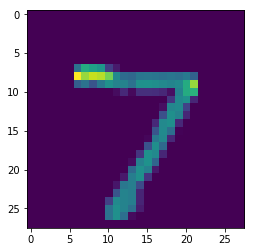

In [26]:
plt.imshow(X_test[0])